# *Website Analysis*

### *Import Library*

In [53]:
import numpy as np
import  pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### *Import DataSet*

In [54]:
df = pd.read_csv("data_Website.csv")

In [55]:
df.head(1)


,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count


### ** Change Column Name **

In [56]:
df.columns = df.iloc[0]

In [57]:
df = df.drop(index=0).reset_index(drop=True)
df.columns= ["channel group", "DateHour", "Users", "Sessions","Engaged sessions", "Average engagement time per session", "Engaged sessions per used", "Events per session", "Engagement rate", "Event count"]

In [58]:
df.columns

Index(['channel group', 'DateHour', 'Users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per used',
       'Events per session', 'Engagement rate', 'Event count'],
      dtype='object')

In [59]:
df.head(1)

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per used,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402


### ** INFORMATION **

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   channel group                        3182 non-null   object
 1   DateHour                             3182 non-null   object
 2   Users                                3182 non-null   object
 3   Sessions                             3182 non-null   object
 4   Engaged sessions                     3182 non-null   object
 5   Average engagement time per session  3182 non-null   object
 6   Engaged sessions per used            3182 non-null   object
 7   Events per session                   3182 non-null   object
 8   Engagement rate                      3182 non-null   object
 9   Event count                          3182 non-null   object
dtypes: object(10)
memory usage: 248.7+ KB


### ** DESCRIBE **

In [61]:
df.describe()

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per used,Events per session,Engagement rate,Event count
count,3182,3182,3182,3182,3182,3182,3182,3182,3182,3182
unique,7,672,147,180,103,2823,808,2025,986,678
top,Direct,2024042417,1,1,0,0,0,1,0,1
freq,672,6,335,340,393,170,393,133,393,115


### ** Check Null Value **

In [62]:
df.isnull().sum()

channel group                          0
DateHour                               0
Users                                  0
Sessions                               0
Engaged sessions                       0
Average engagement time per session    0
Engaged sessions per used              0
Events per session                     0
Engagement rate                        0
Event count                            0
dtype: int64

### ** Check Duplicate Value **

In [63]:
df.duplicated().any()

False

In [64]:
df["DateHour"] = pd.to_datetime(df["DateHour"], format="%Y%m%d%H", errors='coerce')
numeric_cols = df.columns.drop(["channel group", "DateHour"])
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors = 'coerce')
df["Hour"] = df["DateHour"].dt.hour

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   DateHour                             3182 non-null   datetime64[ns]
 2   Users                                3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per used            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  Hour        

In [66]:
df.head(1)

,channel group,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per used,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.48,1402,23


In [67]:
df.describe()

,DateHour,Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per used,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


### 1.**What patterns or trends can you observe in website sessions and users over time?**

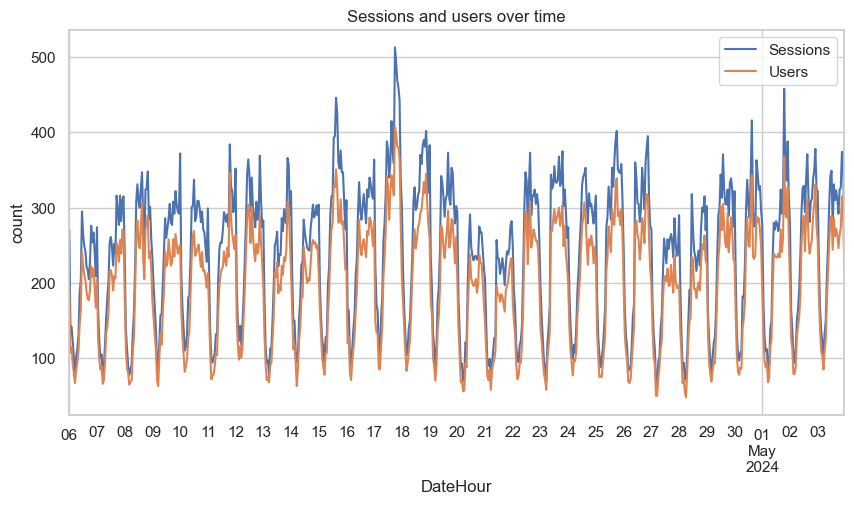

In [68]:
sns.set(style = "whitegrid")
plt.figure(figsize=(10,5))
df.groupby("DateHour")[["Sessions", "Users"]].sum().plot(ax=plt.gca())
plt.title("Sessions and users over time")
plt.xlabel("DateHour")
plt.ylabel("count")
plt.show()

### 2.*Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?*

C:\Users\HI\AppData\Local\Temp\ipykernel_30844\2751830773.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum, palette="viridis")


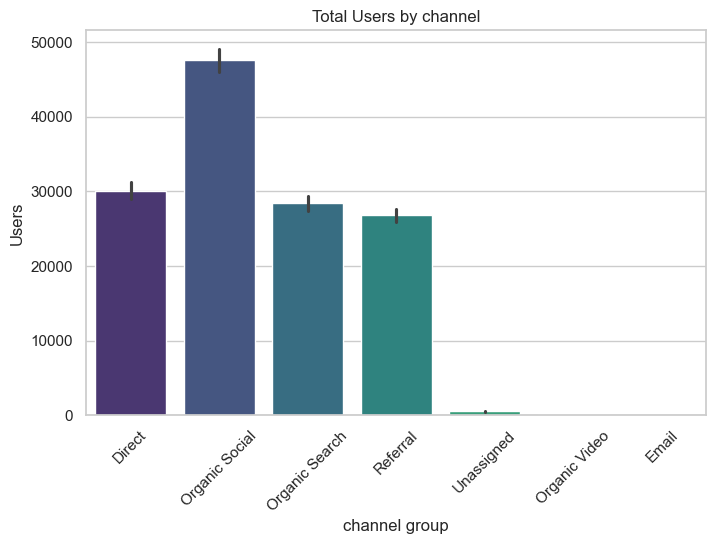

In [69]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group", y="Users", estimator=np.sum, palette="viridis")
plt.title("Total Users by channel")
plt.xticks(rotation = 45)
plt.show()
            

In [70]:
df.columns

Index(['channel group', 'DateHour', 'Users', 'Sessions', 'Engaged sessions',
       'Average engagement time per session', 'Engaged sessions per used',
       'Events per session', 'Engagement rate', 'Event count', 'Hour'],
      dtype='object')

### 3. Which channel has the highest average angagement time, and what does that tell us about user behaviour and content effectiveness?

C:\Users\HI\AppData\Local\Temp\ipykernel_30844\2152583259.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group", y="Average engagement time per session", estimator=np.mean, palette = "magma")


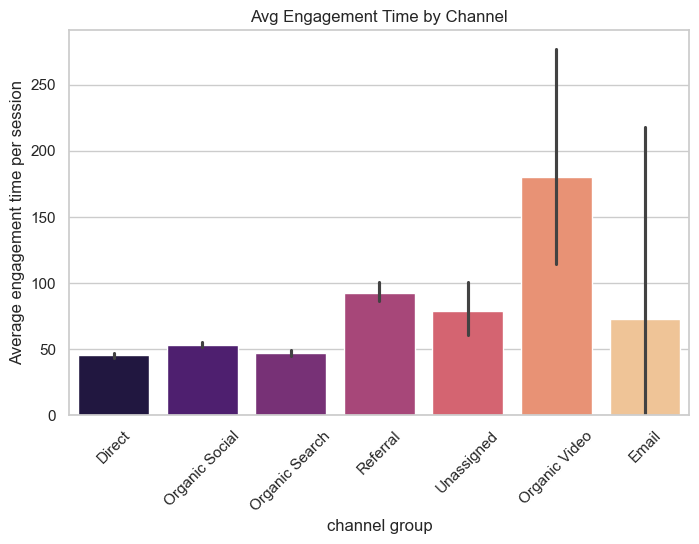

In [71]:
plt.figure(figsize = (8,5))
sns.barplot(data=df, x="channel group", y="Average engagement time per session", estimator=np.mean, palette = "magma")
plt.title("Avg Engagement Time by Channel")
plt.xticks(rotation = 45)
plt.show()

### 4.*How does engagement rate vary across different traffic channels?

C:\Users\HI\AppData\Local\Temp\ipykernel_30844\4265468524.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="channel group", y = "Engagement rate", palette="coolwarm")


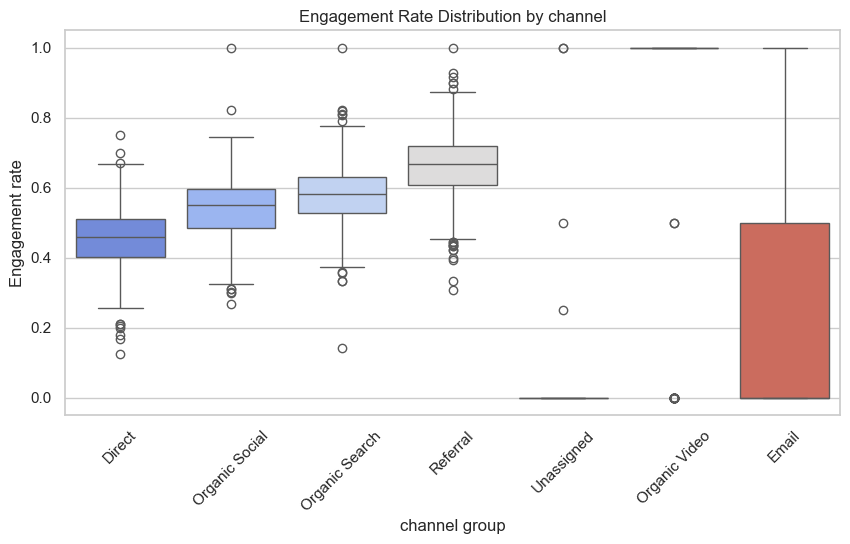

In [75]:
plt.figure(figsize= (10,5))
sns.boxplot(data=df, x="channel group", y = "Engagement rate", palette="coolwarm")
plt.title("Engagement Rate Distribution by channel")
plt.xticks(rotation = 45)
plt.show()

### 5.* Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?

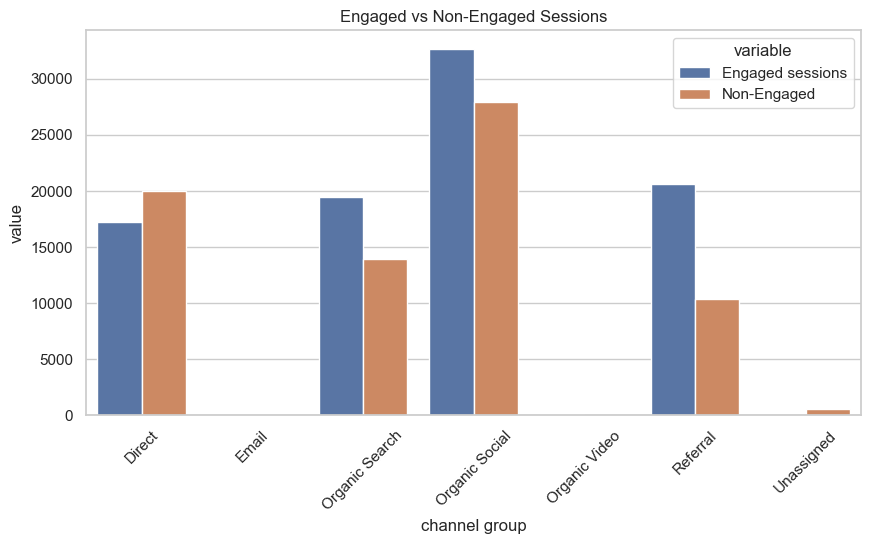

In [77]:
sessions_df = df.groupby("channel group")[["Sessions", "Engaged sessions"]].sum().reset_index()
sessions_df["Non-Engaged"] = sessions_df["Sessions"] -  sessions_df["Engaged sessions"]
sessions_df_melted =sessions_df.melt(id_vars ="channel group", value_vars = ["Engaged sessions", "Non-Engaged"])

plt.figure(figsize=(10,5))
sns.barplot(data=sessions_df_melted, x="channel group", y="value", hue="variable")
plt.title("Engaged vs Non-Engaged Sessions")
plt.xticks(rotation =45)
plt.show()



### 6. **At what hours of the day does each channel drive the most traffic?

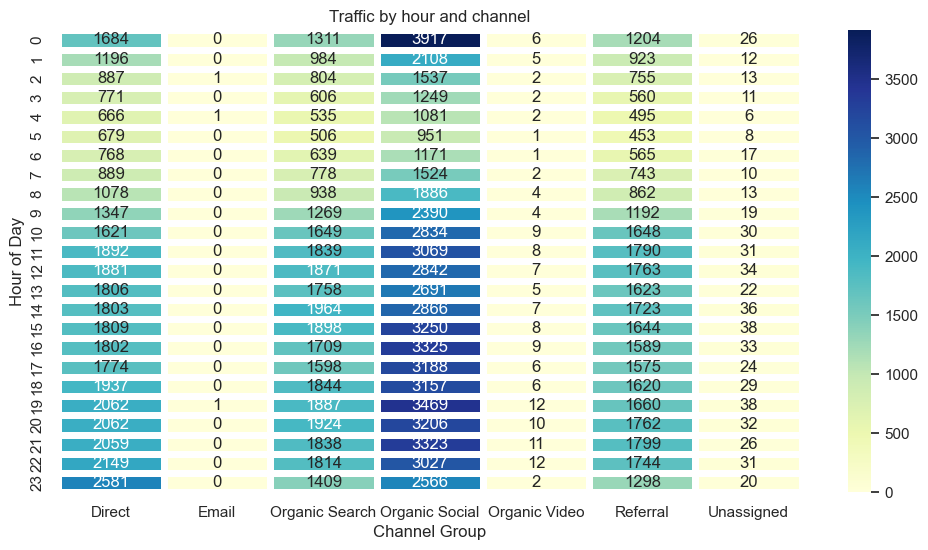

In [79]:
heatmap_data = df.groupby(["Hour", "channel group"])["Sessions"].sum().unstack().fillna(0)
plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=5, annot=True, fmt='.0f')
plt.title("Traffic by hour and channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.show()

### 7. Is there any correlation between high traffic(sessions) and high enngagement rate over time?

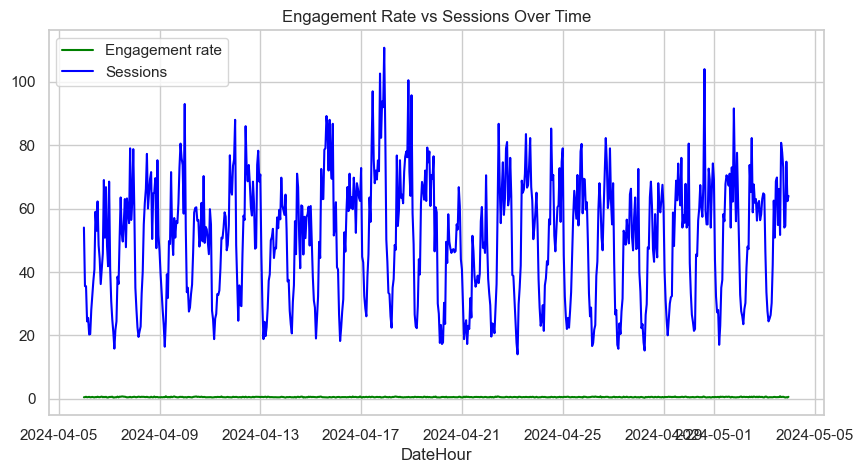

In [80]:
df_plot = df.groupby("DateHour")[["Engagement rate", "Sessions"]].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(df_plot["DateHour"], df_plot["Engagement rate"], label="Engagement rate", color = "green")
plt.plot(df_plot["DateHour"],  df_plot["Sessions"], label="Sessions", color = "blue")
plt.title("Engagement Rate vs Sessions Over Time")
plt.xlabel("DateHour")
plt.legend()
plt.grid(True)
plt.show()